## **UBER DATA ANALYSIS**

In [23]:
# import library
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
df=pd.read_csv("uber.csv")

<IPython.core.display.Javascript object>

In [25]:
df.head()

,Unnamed: 0,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


In [26]:
df.isna().sum()

Unnamed: 0               0
City                     0
Product Type             0
Trip or Order Status     0
Request Time             0
Begin Trip Time          0
Begin Trip Lat          26
Begin Trip Lng          26
Dropoff Time             0
Dropoff Lat             26
Dropoff Lng             26
Distance (miles)         0
Fare Amount              0
Fare Currency            0
dtype: int64

In [27]:
df.dropna(inplace=True,axis=0)

In [28]:
df.describe()

,Unnamed: 0,City,Begin Trip Lat,Begin Trip Lng,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,276.577143,468.708571,-23.560695,-46.622412,-23.567343,-46.615599,4.271048,17.179657
std,162.037198,105.973949,0.069152,0.240816,0.070309,0.241447,3.729289,12.165100
min,0.000000,296.000000,-23.975843,-46.837136,-23.975838,-46.837120,0.000000,0.000000
25%,136.000000,458.000000,-23.602633,-46.666376,-23.611162,-46.666338,1.220000,7.950000
50%,276.000000,458.000000,-23.559450,-46.644786,-23.568158,-46.637291,3.980000,16.980000
75%,418.000000,458.000000,-23.503640,-46.624974,-23.507593,-46.623503,6.080000,25.020000
max,553.000000,1449.000000,-22.903051,-43.105089,-22.902098,-43.114359,19.740000,95.400000


## Business Problem
1. How many times have I traveled in the past?
2. How many trips were completed and canceled?
3. Where did most of the layoffs take place?
4. What type of product is most often selected?
5. What a measure. fare, distance, amount, and time spent on the ride?
6. Which days of the week have the highest fare?
7. Which is the longest / shortest and most expensive / cheapest ride?
8. What is the average lead time before requesting a trip?

In [29]:
# Function to convert features to datetime
def date_convertion(df, cols):
  for col in cols:
    df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
  return df
# Applying date_convertion function to date features 
df = date_convertion(df, ['Request Time', 'Begin Trip Time', 'Dropoff Time'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
def extract_date_components(df):
    df['year']=df['Request Time'].dt.year
    df['month']=df['Request Time'].dt.month
    df['day']=df['Request Time'].dt.day_name()
extract_date_components(df)


In [31]:
df['distance_km']=round(df['Distance (miles)']*1.60934,2)
df['price_per_km']=round(df['Fare Amount']/df['distance_km'],2)

In [32]:
df.head()

,Unnamed: 0,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,day,distance_km,price_per_km
0,0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,1,Wednesday,7.79,3.80
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,1,Wednesday,8.55,2.44
2,2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL,2021,1,Sunday,9.50,3.60
3,3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL,2020,12,Friday,31.77,1.85
4,4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL,2020,12,Friday,4.09,3.09


In [33]:
df.describe()


,Unnamed: 0,City,Begin Trip Lat,Begin Trip Lng,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,year,month,distance_km,price_per_km
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,463.00
mean,276.577143,468.708571,-23.560695,-46.622412,-23.567343,-46.615599,4.271048,17.179657,2018.177143,6.024762,6.873638,inf
std,162.037198,105.973949,0.069152,0.240816,0.070309,0.241447,3.729289,12.165100,1.103884,3.700804,6.001731,NaN
min,0.000000,296.000000,-23.975843,-46.837136,-23.975838,-46.837120,0.000000,0.000000,2015.000000,1.000000,0.000000,0.00
25%,136.000000,458.000000,-23.602633,-46.666376,-23.611162,-46.666338,1.220000,7.950000,2017.000000,3.000000,1.960000,2.21
50%,276.000000,458.000000,-23.559450,-46.644786,-23.568158,-46.637291,3.980000,16.980000,2018.000000,6.000000,6.410000,2.65
75%,418.000000,458.000000,-23.503640,-46.624974,-23.507593,-46.623503,6.080000,25.020000,2019.000000,10.000000,9.780000,3.87
max,553.000000,1449.000000,-22.903051,-43.105089,-22.902098,-43.114359,19.740000,95.400000,2021.000000,12.000000,31.770000,inf


<AxesSubplot:xlabel='year,Trip or Order Status'>

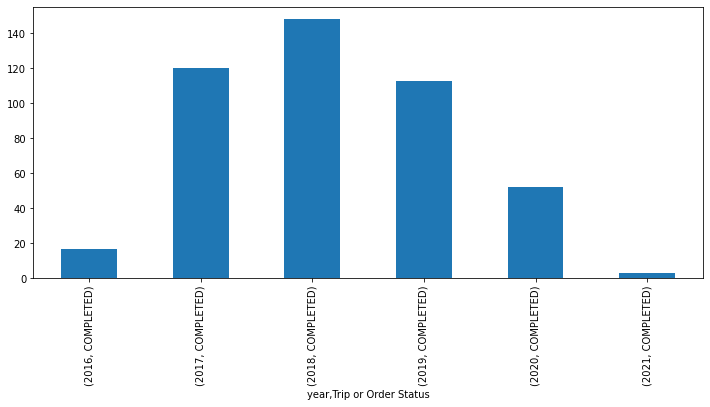

In [86]:
# 1. How many times have I traveled in the past?
df[df['Trip or Order Status']=='COMPLETED'].groupby('year')['Trip or Order Status'].value_counts().plot.bar(figsize=(12,5))

<AxesSubplot:xlabel='year'>

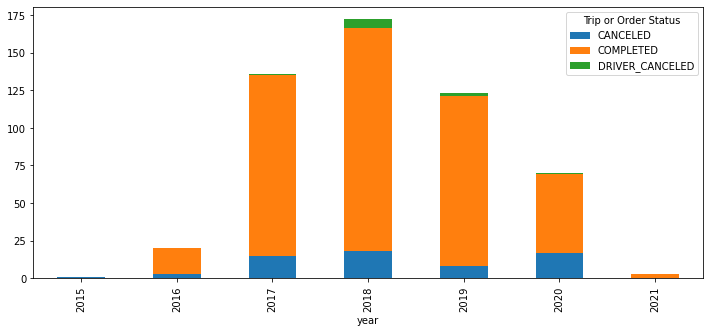

In [85]:
#2. How many trips were completed and cancelled?
df[df['Trip or Order Status'].isin(['COMPLETED','CANCELED','DRIVER_CANCELED'])].groupby('year')['Trip or Order Status'].value_counts().unstack('Trip or Order Status').plot.bar(stacked=True,figsize=(12,5))

In [36]:
#3. Where did most of the layoffs take place?
!pip install folium
import folium
from folium import plugins
coord=[]
for lat,lng in zip(df['Dropoff Lat'],df['Dropoff Lng']):
  coord.append([lat,lng])
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=12,
    width='100%', 
    height='100%',
    control_scale=True)
map.add_child(plugins.HeatMap(coord))

<AxesSubplot:xlabel='year'>

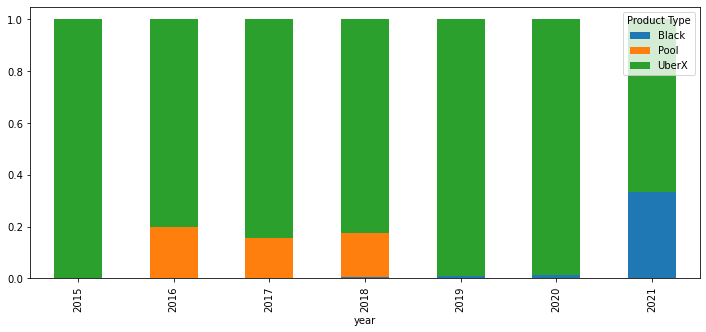

In [84]:
# 4. What type of product is most often selected?
df.groupby('year')['Product Type'].value_counts(normalize=True).unstack('Product Type').plot.bar(stacked=True,figsize=(12,5))

In [37]:

# 5. What a measure. fare, distance, amount, and time spent on the ride?

df.head(2)

,Unnamed: 0,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency,year,month,day,distance_km,price_per_km
0,0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,1,Wednesday,7.79,3.80
1,1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,1,Wednesday,8.55,2.44


In [38]:
print('Average distance travelled is {i} km'.format(i=round(np.mean(df['distance_km']),2)))
print('Average price is {i} BRL'.format(i=round(np.mean(df['Fare Amount']),2)))

<IPython.core.display.Javascript object>

Average distance travelled is 6.87 km


<IPython.core.display.Javascript object>

Average price is 17.18 BRL


In [39]:
df['Travel_time_min']=(df['Dropoff Time']-df['Begin Trip Time']).apply(lambda x: round(x.total_seconds()/60,0))

In [40]:
print('Average distance travelled is {i} km'.format(i=round(np.mean(df['distance_km']),2)))
print('Average time travelled is {i} min'.format(i=round(((df['Dropoff Time']-df['Begin Trip Time']).apply(lambda x: round(x.total_seconds()/60,0)).sort_values()[7:]).mean(),0)))
print('Total distance travelled is {i} km'.format(i=round(np.sum(df['distance_km']),2)))
print('Total time travelled is {i} min'.format(i=round(((df['Dropoff Time']-df['Begin Trip Time']).apply(lambda x: round(x.total_seconds()/60,0)).sort_values()[7:]).sum(),0)))
print('Average price is {i} BRL'.format(i=round(np.mean(df['Fare Amount']),2)))
print('Average price {i} BRL/km'.format(i=round((np.sum(df['Fare Amount'])/np.sum(df['distance_km'])),2)))

<IPython.core.display.Javascript object>

Average distance travelled is 6.87 km
Average time travelled is 19.0 min


<IPython.core.display.Javascript object>

Total distance travelled is 3608.66 km
Total time travelled is 9665.0 min


<IPython.core.display.Javascript object>

Average price is 17.18 BRL


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Average price 2.5 BRL/km


<AxesSubplot:xlabel='day'>

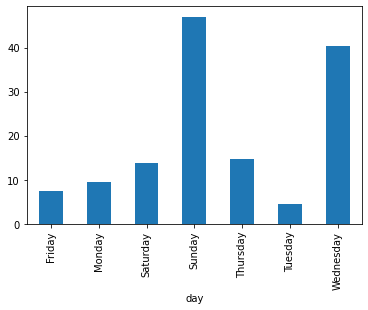

In [44]:
#6. Which days of the week have the highest fare?
df[df['Trip or Order Status']=='COMPLETED'].groupby('day')['price_per_km'].max().plot.bar()

In [57]:

# 7. Which is the longest / shortest and most expensive / cheapest ride?

ans7=[]
def show_result(df):
    dff=df[df['Trip or Order Status']=='COMPLETED']
    ans7.append({
    'longest_ride in km':dff['distance_km'].max(),
    'shortest_ride in km':dff['distance_km'].min(),
    'most_expensive ride in Rs per km':dff['price_per_km'].max(),
    'cheapest ride in rs per km':dff['price_per_km'].min()
    
})
show_result(df)
ans7

[{'longest_ride in km': 31.77,
  'shortest_ride in km': 0.24,
  'most_expensive ride in Rs per km': 46.96,
  'cheapest ride in rs per km': 0.0}]

In [81]:
# 8. What is the average lead time before requesting a trip?
df['lead_time']=(df['Begin Trip Time']-df['Request Time']).apply(lambda x: round(x.total_seconds()/60,1))
print('average lead time before requesting a trip is {i} min'.format(i=round(df[df['lead_time']>=0]['lead_time'].mean(),1)))

average lead time before requesting a trip is 5.4 min
